In [ ]:
!pip install catboost
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras import backend
from tensorflow.keras import metrics
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Анализ полученных данных



In [226]:
data_plane_full = pd.read_csv('/content/X_train.csv')
data_plane_full

,engine_id,aircraft_id,flight_datetime,flight_phase,engine_position,n1_modifier,number_blades,engine_family,engine_type,manufacturer,...,ZT1A,ZVIAS,ZWBP1,ZWBP1_8E,ZWBP2,ZWBP2_8E,ZXM,IBE,IBP,IAIE
0,14aa1250a60229a6f0fc62e973fe757d076f897e4bc93a...,adb019dcde61d092941e0fec4e89b405130df238877e26...,2022-02-08 03:50:15,TAKEOFF,1,6.0,36.0,CFM56-5B,CFM56-5B4,CFM INTERNATIONAL,...,-2.90,NaN,1.168449,NaN,1.190495,NaN,0.2470,1.0,NaN,1.0
1,6dc714d821a73d97c06143281b622c4e45c791985425c8...,31baf613cc66c483d5576812d060e54d64275325be437f...,2022-07-24 02:46:01,CRUISE,2,0.0,28.0,CF34-8E,CF34-8E5,GE AIRCRAFT ENGINES,...,-21.10,261.299988,NaN,28.8281,NaN,26.4062,0.7110,1.0,1.0,0.0
2,dda2a4e5f8b7c39356d9da1279e61b44bf4362c6cf46a0...,47ea147feec375157fdc4ef94bce6803be3f847399e52a...,2022-05-31 22:40:14,TAKEOFF,2,6.0,36.0,CFM56-5B,CFM56-5B4,CFM INTERNATIONAL,...,17.50,NaN,0.088185,NaN,0.088185,NaN,0.2420,0.0,NaN,0.0
3,f5a5af90e581be9a4b812c1000c5a9fa938741889bab62...,30c6570a99d5554ca6975f2ca386e7d3af1b3b92dc063e...,2022-05-25 23:50:56,CRUISE,2,5.0,36.0,CFM56-5B,CFM56-5B4,CFM INTERNATIONAL,...,-15.40,NaN,0.925940,NaN,0.925940,NaN,0.7690,1.0,NaN,NaN
4,364a94e57c5e7705c650bdadda955186d3a8f9d96a3d9e...,86b6b690d8ede50869aa2562b655a65abd786d169572b4...,2022-06-29 22:08:24,CRUISE,1,4.0,24.0,CFM56-7,CFM56-7B27/B1,CFM INTERNATIONAL,...,-20.75,NaN,NaN,NaN,NaN,NaN,0.7807,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47789,6dc714d821a73d97c06143281b622c4e45c791985425c8...,31baf613cc66c483d5576812d060e54d64275325be437f...,2022-07-09 18:09:56,TAKEOFF,2,0.0,28.0,CF34-8E,CF34-8E5,GE AIRCRAFT ENGINES,...,26.10,170.100006,NaN,0.0000,NaN,15.7343,0.2610,1.0,1.0,0.0
47790,3318d095d6368cfec7db7a1d2ccce3113d90d7862f83bf...,c05cd165b18429005bb1018b5c86eb8378a1c8e7057eff...,2022-05-15 23:22:18,TAKEOFF,2,2.0,24.0,CFM56-7,CFM56-7B26,CFM INTERNATIONAL,...,14.00,NaN,NaN,NaN,NaN,NaN,0.2965,1.0,1.0,0.0
47791,ad05ea492912b47057a29221b2b96b1d527b2347231981...,a0119e19d7f710c158729bc4153a6996e891b54664262b...,2022-07-04 01:50:27,CRUISE,2,7.0,36.0,CFM56-5B,CFM56-5B3,CFM INTERNATIONAL,...,-7.90,NaN,1.124356,NaN,1.124356,NaN,0.7680,1.0,NaN,NaN
47792,44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe...,a3ee6d52224435498a06cbd1b6fbddb98d4c0ae15f52ad...,2022-06-12 08:45:57,TAKEOFF,2,0.0,28.0,CF34-8E,CF34-8E5,GE AIRCRAFT ENGINES,...,22.50,180.199997,NaN,0.0000,NaN,0.0000,0.2770,1.0,1.0,0.0


In [227]:
data_plane_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47794 entries, 0 to 47793
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   engine_id        47794 non-null  object 
 1   aircraft_id      47794 non-null  object 
 2   flight_datetime  47794 non-null  object 
 3   flight_phase     47794 non-null  object 
 4   engine_position  47794 non-null  int64  
 5   n1_modifier      47794 non-null  float64
 6   number_blades    47794 non-null  float64
 7   engine_family    47794 non-null  object 
 8   engine_type      47794 non-null  object 
 9   manufacturer     47794 non-null  object 
 10  ZHPTAC           11957 non-null  float64
 11  ZLPTAC           11957 non-null  float64
 12  ZPCN12           47794 non-null  float64
 13  ZPCN25           47794 non-null  float64
 14  ZPHSF            13336 non-null  float64
 15  ZPHSR            13336 non-null  float64
 16  ZPN12R           18382 non-null  float64
 17  ZPOIL       

In [228]:
#Смотрем процент отсутсвующих величин
cols_null_persent = data_plane_full.isnull().mean() * 100
cols_null_persent

engine_id           0.000000
aircraft_id         0.000000
flight_datetime     0.000000
flight_phase        0.000000
engine_position     0.000000
n1_modifier         0.000000
number_blades       0.000000
engine_family       0.000000
engine_type         0.000000
manufacturer        0.000000
ZHPTAC             74.982215
ZLPTAC             74.982215
ZPCN12              0.000000
ZPCN25              0.000000
ZPHSF              72.096916
ZPHSR              72.096916
ZPN12R             61.539105
ZPOIL              20.789220
ZPS3               61.541198
ZT1AB              61.539105
ZT3                61.541198
ZT49                0.000000
ZTAMB              61.537013
ZTLA               61.537013
ZTNAC              74.982215
ZTOIL              20.789220
ZVB1F               0.010462
ZVB1R              54.236934
ZVB2F              54.259949
ZVB2R              15.796962
ZVSV               36.523413
ZWF36              20.755743
IHPSOV             61.537013
aircraft_family     0.000000
aircraft_type 

In [229]:
#Смотрим распределение 3-х наибольших, поиск выбросов
def outliers_iqr(data, feature, log=False, left=1.5, right=1.5):
    if log:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75) 
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

Количество найденных выбросов - ZHPTAC: 1830


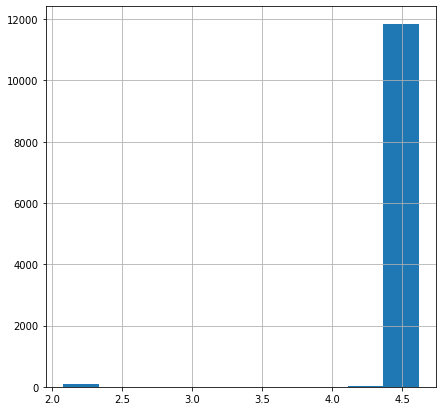

In [230]:
np.log(data_plane_full['ZHPTAC'] + 1).hist();
outliers, iqr_data = outliers_iqr(data_plane_full, 'ZHPTAC', log=True, left=3, right=3)
print('Количество найденных выбросов - ZHPTAC:', outliers.shape[0])

Количество найденных выбросов - ZLPTAC: 231


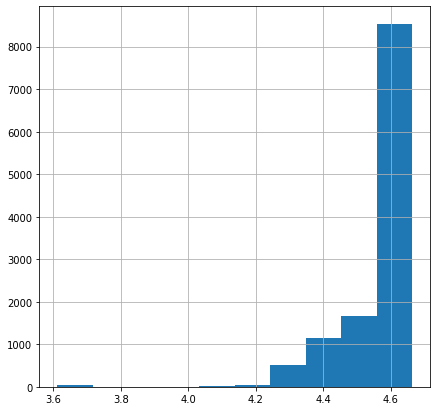

In [231]:
np.log(data_plane_full['ZLPTAC'] + 1).hist();
outliers, iqr_data = outliers_iqr(data_plane_full, 'ZLPTAC', log=True, left=3, right=3)
print('Количество найденных выбросов - ZLPTAC:', outliers.shape[0])

Количество найденных выбросов - ZPHSF: 130


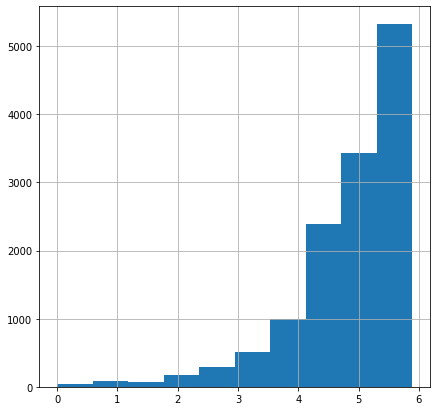

In [232]:
np.log(data_plane_full['ZPHSF'] + 1).hist();
outliers, iqr_data = outliers_iqr(data_plane_full, 'ZPHSF', log=True, left=3, right=3)
print('Количество найденных выбросов - ZPHSF:', outliers.shape[0])

In [233]:
#Какие числа содержат в себе признаки
for col in data_plane_full.columns:
  if len(data_plane_full[col].unique()) <= 10:
    print(data_plane_full[col].unique())
    print(col)


['TAKEOFF' 'CRUISE']
flight_phase
[1 2]
engine_position
[6. 0. 5. 4. 3. 1. 2. 7.]
n1_modifier
[36. 28. 24.]
number_blades
['CFM56-5B' 'CF34-8E' 'CFM56-7']
engine_family
['CFM56-5B4' 'CF34-8E5' 'CFM56-7B27/B1' 'CFM56-7B26' 'CFM56-5B3']
engine_type
['CFM INTERNATIONAL' 'GE AIRCRAFT ENGINES']
manufacturer
[nan  0.]
IHPSOV
['A320' 'EMBRAER RJ' 'B737']
aircraft_family
['A320-200' 'ERJ170' 'B737-800' 'A321-200']
aircraft_type
['A320-214' 'EMBRAER 170-100' 'B737-83N' 'B737-8LP' 'A321-211' 'B737-8Q8'
 'B737-8ZS' 'B737-8GJ' 'B737-BCF']
aircraft_grp
['AIRBUS' 'EMBRAER' 'BOEING']
ac_manufacturer
[ 0. nan  1.]
IAI
[ 0. nan  1.]
IVS12
[1. 0.]
IBE
[nan  1.  0.]
IBP
[ 1.  0. nan]
IAIE


In [234]:
#Заменяем null значения модальными в столбцах, где два уникальных значения, показываем модели что данные "сфабрикованы"
arr = ['IAI', 'IVS12', 'IBP', 'IAIE']
columns_to = []
for col in data_plane_full.columns:
  if cols_null_persent[col] != 0.0:
      if col in arr:
        data_plane_full[col + '_was_null'] = data_plane_full[col].isnull().astype('int')
        data_plane_full.fillna({col:data_plane_full[col].mode()[0]}, inplace = True)
      else:
       data_plane_full[col + '_was_null'] = data_plane_full[col].isnull().astype('int') 
       columns_to.append(col)

data_p = data_plane_full.copy()
    
data_p

,engine_id,aircraft_id,flight_datetime,flight_phase,engine_position,n1_modifier,number_blades,engine_family,engine_type,manufacturer,...,IAI_was_null,IVS12_was_null,SAT_was_null,ZVIAS_was_null,ZWBP1_was_null,ZWBP1_8E_was_null,ZWBP2_was_null,ZWBP2_8E_was_null,IBP_was_null,IAIE_was_null
0,14aa1250a60229a6f0fc62e973fe757d076f897e4bc93a...,adb019dcde61d092941e0fec4e89b405130df238877e26...,2022-02-08 03:50:15,TAKEOFF,1,6.0,36.0,CFM56-5B,CFM56-5B4,CFM INTERNATIONAL,...,0,0,1,1,0,1,0,1,1,0
1,6dc714d821a73d97c06143281b622c4e45c791985425c8...,31baf613cc66c483d5576812d060e54d64275325be437f...,2022-07-24 02:46:01,CRUISE,2,0.0,28.0,CF34-8E,CF34-8E5,GE AIRCRAFT ENGINES,...,1,1,1,0,1,0,1,0,0,0
2,dda2a4e5f8b7c39356d9da1279e61b44bf4362c6cf46a0...,47ea147feec375157fdc4ef94bce6803be3f847399e52a...,2022-05-31 22:40:14,TAKEOFF,2,6.0,36.0,CFM56-5B,CFM56-5B4,CFM INTERNATIONAL,...,0,0,1,1,0,1,0,1,1,0
3,f5a5af90e581be9a4b812c1000c5a9fa938741889bab62...,30c6570a99d5554ca6975f2ca386e7d3af1b3b92dc063e...,2022-05-25 23:50:56,CRUISE,2,5.0,36.0,CFM56-5B,CFM56-5B4,CFM INTERNATIONAL,...,1,0,1,1,0,1,0,1,1,1
4,364a94e57c5e7705c650bdadda955186d3a8f9d96a3d9e...,86b6b690d8ede50869aa2562b655a65abd786d169572b4...,2022-06-29 22:08:24,CRUISE,1,4.0,24.0,CFM56-7,CFM56-7B27/B1,CFM INTERNATIONAL,...,1,0,0,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47789,6dc714d821a73d97c06143281b622c4e45c791985425c8...,31baf613cc66c483d5576812d060e54d64275325be437f...,2022-07-09 18:09:56,TAKEOFF,2,0.0,28.0,CF34-8E,CF34-8E5,GE AIRCRAFT ENGINES,...,0,1,1,0,1,0,1,0,0,0
47790,3318d095d6368cfec7db7a1d2ccce3113d90d7862f83bf...,c05cd165b18429005bb1018b5c86eb8378a1c8e7057eff...,2022-05-15 23:22:18,TAKEOFF,2,2.0,24.0,CFM56-7,CFM56-7B26,CFM INTERNATIONAL,...,0,0,0,1,1,1,1,1,0,0
47791,ad05ea492912b47057a29221b2b96b1d527b2347231981...,a0119e19d7f710c158729bc4153a6996e891b54664262b...,2022-07-04 01:50:27,CRUISE,2,7.0,36.0,CFM56-5B,CFM56-5B3,CFM INTERNATIONAL,...,1,0,1,1,0,1,0,1,1,1
47792,44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe...,a3ee6d52224435498a06cbd1b6fbddb98d4c0ae15f52ad...,2022-06-12 08:45:57,TAKEOFF,2,0.0,28.0,CF34-8E,CF34-8E5,GE AIRCRAFT ENGINES,...,0,1,1,0,1,0,1,0,0,0


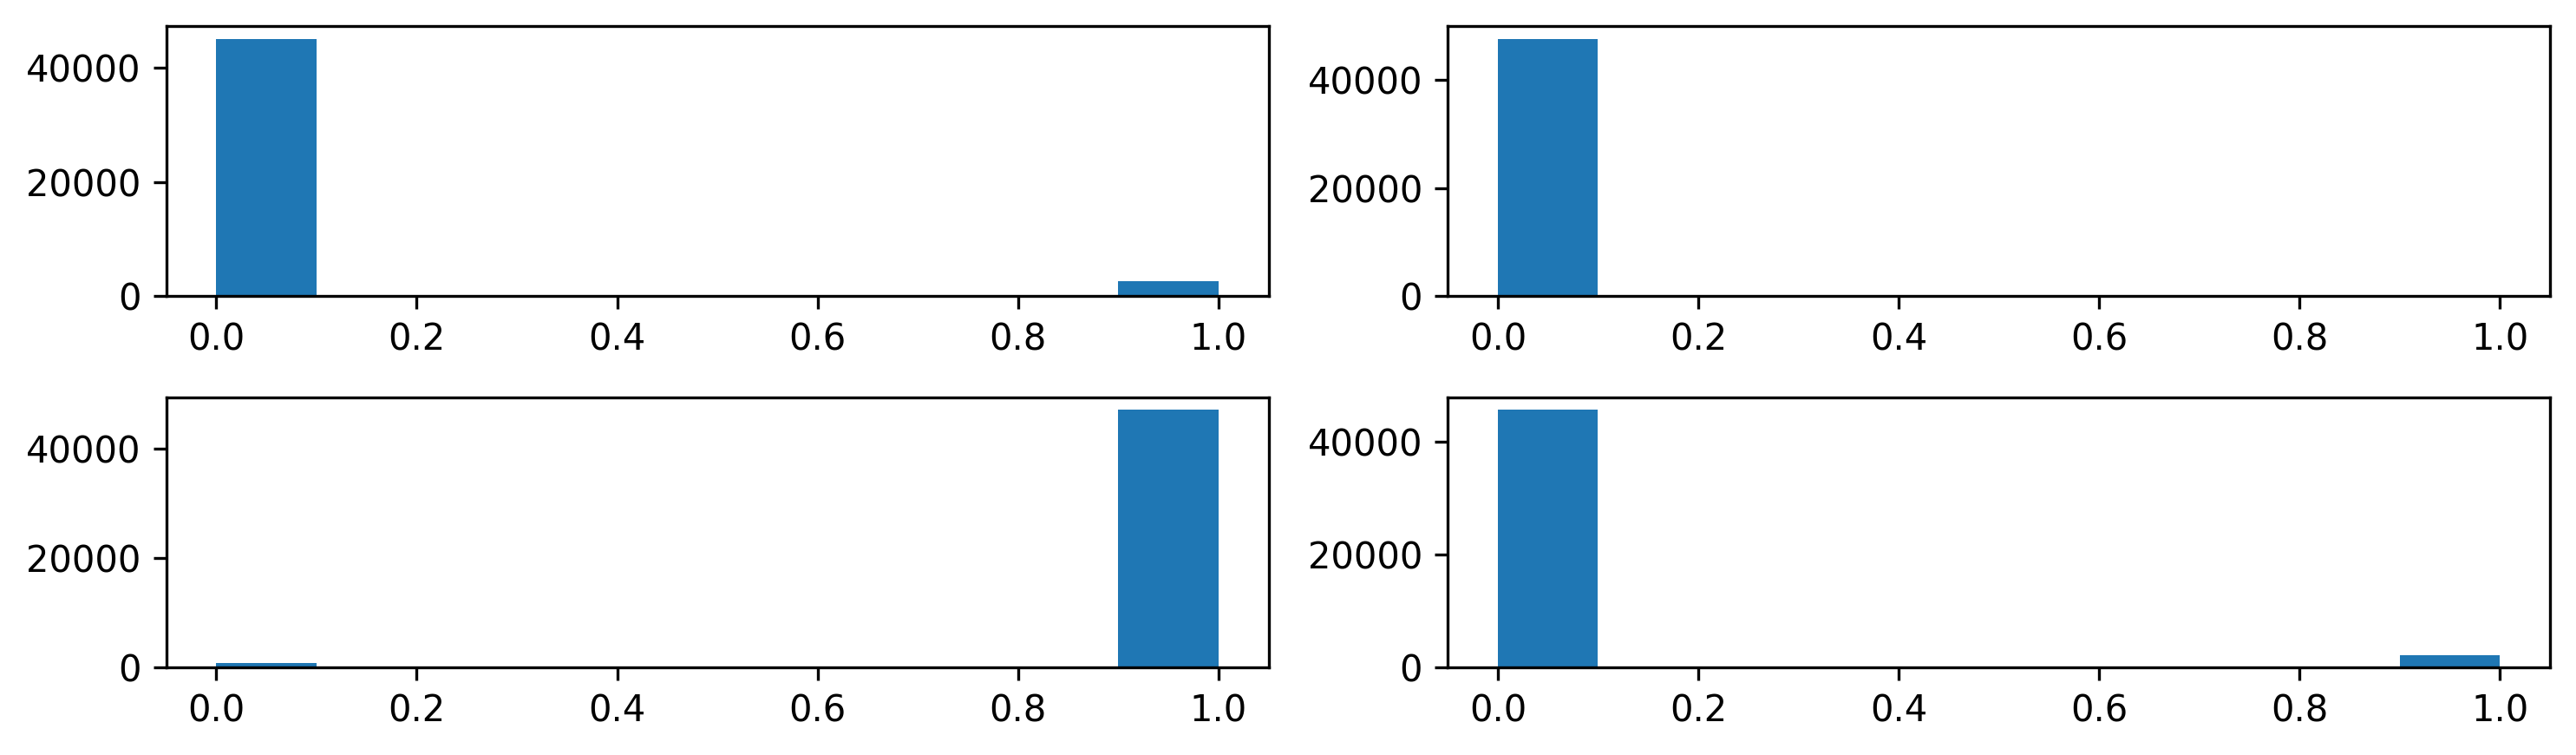

In [235]:
#рассмотрим распределение данных признаков
fig, axes = plt.subplots(nrows = 2, ncols = 2, dpi = 300, figsize = (10, 3))
axes[0][0].hist(data_p['IAI']);
axes[0][1].hist(data_p['IVS12']);
axes[1][0].hist(data_p['IBP']);
axes[1][1].hist(data_p['IAIE']);
plt.tight_layout()

In [236]:
data_p.describe()

,engine_position,n1_modifier,number_blades,ZHPTAC,ZLPTAC,ZPCN12,ZPCN25,ZPHSF,ZPHSR,ZPN12R,...,IAI_was_null,IVS12_was_null,SAT_was_null,ZVIAS_was_null,ZWBP1_was_null,ZWBP1_8E_was_null,ZWBP2_was_null,ZWBP2_8E_was_null,IBP_was_null,IAIE_was_null
count,47794.000000,47794.000000,47794.000000,11957.000000,11957.000000,47794.000000,47794.000000,13336.000000,13336.000000,18382.000000,...,47794.000000,47794.000000,47794.000000,47794.000000,47794.000000,47794.000000,47794.000000,47794.000000,47794.000000,47794.000000
mean,1.499058,1.670628,29.155291,97.721168,94.621811,86.010355,90.455727,170.822211,151.835783,88.718513,...,0.597816,0.384630,0.686028,0.615412,0.698602,0.615370,0.698602,0.615370,0.301398,0.407813
std,0.500004,2.212617,4.793620,9.175314,9.105777,6.069889,6.069993,102.190039,101.276293,4.571515,...,0.490344,0.486513,0.464110,0.486503,0.458870,0.486513,0.458870,0.486513,0.458870,0.491433
min,1.000000,0.000000,24.000000,7.000000,36.000000,0.000000,0.000000,0.000000,0.000000,75.828102,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,24.000000,99.000000,92.000000,83.921799,87.453102,88.000000,59.000000,84.843697,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,28.000000,100.000000,99.000000,85.890602,91.400002,157.000000,140.000000,86.515602,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,4.000000,36.000000,100.000000,100.000000,88.629997,93.900002,257.000000,221.000000,92.687500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,7.000000,36.000000,100.000000,105.000000,103.120003,127.129997,360.000000,360.000000,102.795998,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [237]:
data_p.corr() #В некоторых ячейках видна высокая корреляция между признаками

,engine_position,n1_modifier,number_blades,ZHPTAC,ZLPTAC,ZPCN12,ZPCN25,ZPHSF,ZPHSR,ZPN12R,...,IAI_was_null,IVS12_was_null,SAT_was_null,ZVIAS_was_null,ZWBP1_was_null,ZWBP1_8E_was_null,ZWBP2_was_null,ZWBP2_8E_was_null,IBP_was_null,IAIE_was_null
engine_position,1.000000,-0.004611,-0.006251,-0.007416,-0.012441,-0.000853,0.009145,-0.006504,0.017041,-0.006399,...,-0.002483,-0.001479,-0.006413,0.001479,0.004919,0.001479,0.004919,0.001479,-0.004919,0.000328
n1_modifier,-0.004611,1.000000,0.669097,-0.013395,0.224387,-0.072754,0.347425,0.129903,-0.205414,NaN,...,0.239868,-0.596941,0.158734,0.596888,-0.793448,0.596941,-0.793448,0.596941,0.793448,0.531266
number_blades,-0.006251,0.669097,1.000000,NaN,NaN,-0.246464,0.112479,NaN,NaN,NaN,...,0.289402,-0.190540,0.727561,0.190523,-0.937888,0.190540,-0.937888,0.190540,0.937888,0.381943
ZHPTAC,-0.007416,-0.013395,NaN,1.000000,0.492660,0.669418,0.391252,-0.003557,-0.022599,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZLPTAC,-0.012441,0.224387,NaN,0.492660,1.000000,0.155969,0.092248,0.016202,-0.044610,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWBP1_8E_was_null,0.001479,0.596941,0.190540,NaN,NaN,0.154726,0.574178,NaN,NaN,NaN,...,0.167404,-1.000000,-0.534845,0.999912,-0.519288,1.000000,-0.519288,1.000000,0.519288,0.656076
ZWBP2_was_null,0.004919,-0.793448,-0.937888,NaN,NaN,0.159877,-0.300840,NaN,NaN,NaN,...,-0.311101,0.519288,-0.444355,-0.519242,1.000000,-0.519288,1.000000,-0.519288,-1.000000,-0.564366
ZWBP2_8E_was_null,0.001479,0.596941,0.190540,NaN,NaN,0.154726,0.574178,NaN,NaN,NaN,...,0.167404,-1.000000,-0.534845,0.999912,-0.519288,1.000000,-0.519288,1.000000,0.519288,0.656076
IBP_was_null,-0.004919,0.793448,0.937888,NaN,NaN,-0.159877,0.300840,NaN,NaN,NaN,...,0.311101,-0.519288,0.444355,0.519242,-1.000000,0.519288,-1.000000,0.519288,1.000000,0.564366


In [238]:
# Заменим null значения с помощью IterativeImputer для сохранения точности данных
imp_mean = IterativeImputer(random_state=0)
imp_mean = imp_mean.fit_transform(data_p[columns_to])
data_full = pd.DataFrame(imp_mean, columns=columns_to)
data_p = pd.concat([
    data_p.drop(columns_to, axis=1),
    data_full
], axis=1)


data_p.head()
columns_to

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


['ZHPTAC',
 'ZLPTAC',
 'ZPHSF',
 'ZPHSR',
 'ZPN12R',
 'ZPOIL',
 'ZPS3',
 'ZT1AB',
 'ZT3',
 'ZTAMB',
 'ZTLA',
 'ZTNAC',
 'ZTOIL',
 'ZVB1F',
 'ZVB1R',
 'ZVB2F',
 'ZVB2R',
 'ZVSV',
 'ZWF36',
 'IHPSOV',
 'AGW',
 'CAS',
 'SAT',
 'ZVIAS',
 'ZWBP1',
 'ZWBP1_8E',
 'ZWBP2',
 'ZWBP2_8E']

In [239]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47794 entries, 0 to 47793
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_id          47794 non-null  object 
 1   aircraft_id        47794 non-null  object 
 2   flight_datetime    47794 non-null  object 
 3   flight_phase       47794 non-null  object 
 4   engine_position    47794 non-null  int64  
 5   n1_modifier        47794 non-null  float64
 6   number_blades      47794 non-null  float64
 7   engine_family      47794 non-null  object 
 8   engine_type        47794 non-null  object 
 9   manufacturer       47794 non-null  object 
 10  ZPCN12             47794 non-null  float64
 11  ZPCN25             47794 non-null  float64
 12  ZT49               47794 non-null  float64
 13  aircraft_family    47794 non-null  object 
 14  aircraft_type      47794 non-null  object 
 15  aircraft_grp       47794 non-null  object 
 16  ac_manufacturer    477

Количество найденных выбросов - ZHPTAC: 14444


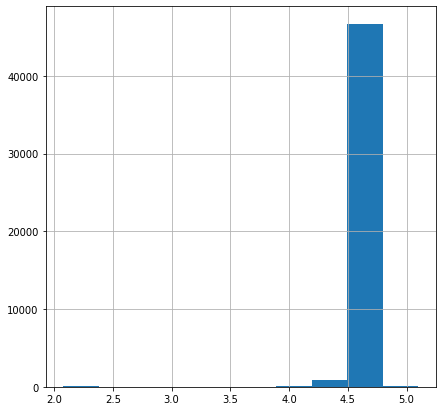

In [240]:
#снова проверим распределения 3-х величин
np.log(data_p['ZHPTAC'] + 1).hist();
outliers, iqr_data = outliers_iqr(data_p, 'ZHPTAC', log=True, left=10, right=10)
print('Количество найденных выбросов - ZHPTAC:', outliers.shape[0])

Количество найденных выбросов - ZHPTAC: 17021


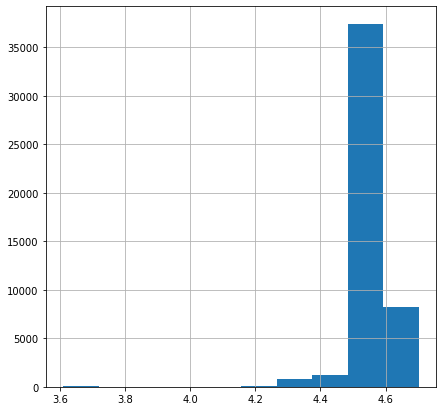

In [241]:
np.log(data_p['ZLPTAC'] + 1).hist();
outliers, iqr_data = outliers_iqr(data_p, 'ZLPTAC', log=True, left=10, right=10)
print('Количество найденных выбросов - ZHPTAC:', outliers.shape[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Количество найденных выбросов - ZHPTAC: 13809


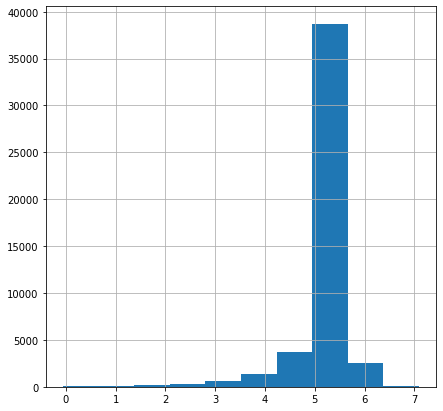

In [242]:
np.log(data_p['ZPHSF'] + 1).hist();
outliers, iqr_data = outliers_iqr(data_p, 'ZPHSF', log=True, left=10, right=10)
print('Количество найденных выбросов - ZHPTAC:', outliers.shape[0])

In [243]:
#исследуем виды двигателей
data_p['engine_type'].unique()

array(['CFM56-5B4', 'CF34-8E5', 'CFM56-7B27/B1', 'CFM56-7B26',
       'CFM56-5B3'], dtype=object)

In [244]:
#удалим столбцы с бесполезными данными
data_p.drop('engine_id', axis=1, inplace=True)
data_p.drop('flight_datetime', axis=1, inplace=True)
data_p.drop('aircraft_id', axis=1, inplace=True)

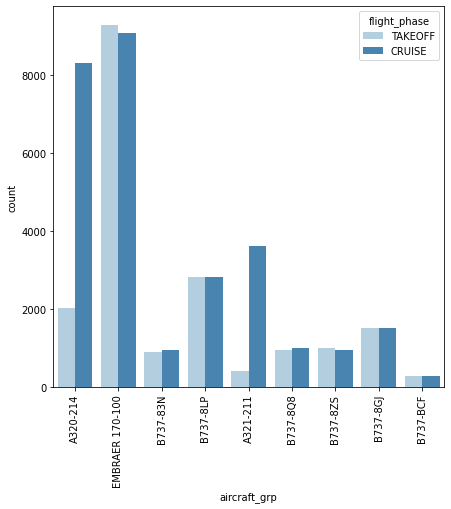

In [245]:
#изучим категориальные признаки
ax = sns.countplot(data=data_p, x='aircraft_grp', palette = "Blues", hue='flight_phase');
plt.rcParams['figure.figsize']=(10,4)
plt.tight_layout
ax.xaxis.set_tick_params(rotation=90)
fig = ax.get_figure()

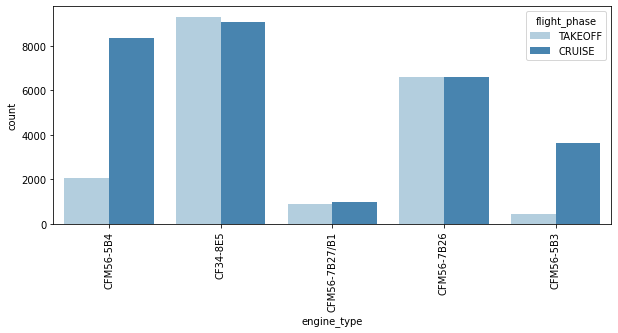

In [246]:
ax = sns.countplot(data=data_p, x='engine_type', palette = "Blues", hue='flight_phase');
plt.rcParams['figure.figsize']=(10,4)
plt.tight_layout 
ax.xaxis.set_tick_params(rotation=90)
fig = ax.get_figure()

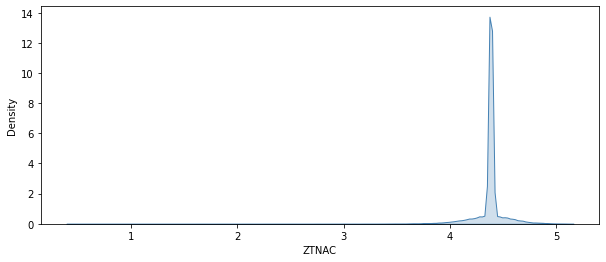

In [247]:
#Смотрим распределение температуры в полёте
sns.kdeplot(np.log(data_p['ZTNAC'] + 1), shade=True, color='steelblue')
plt.rcParams['figure.figsize']=(5, 5)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


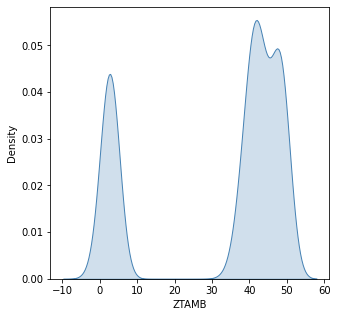

In [248]:
sns.kdeplot(np.log(data_p['ZTAMB'] + 1), shade=True, color='steelblue')
plt.rcParams['figure.figsize']=(5, 5)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


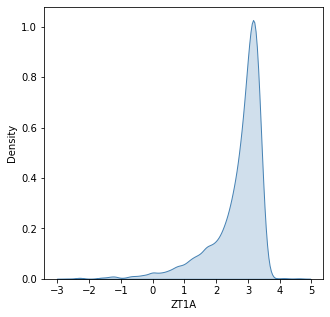

In [249]:
sns.kdeplot(np.log(data_p['ZT1A'] + 1), shade=True, color='steelblue')
plt.rcParams['figure.figsize']=(5, 5)

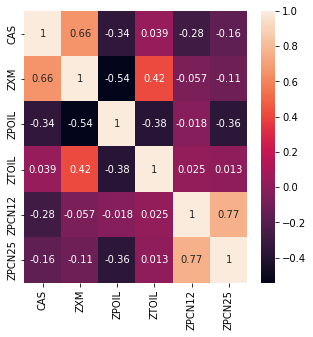

In [250]:
#Изучаем зависимость между скоростью самолёта и поведением двигателя
to_corr = data_p[['CAS', 'ZXM', 'ZPOIL', 'ZTOIL', 'ZPCN12', 'ZPCN25']]
sns.heatmap(to_corr.corr(), annot=True)
plt.rcParams['figure.figsize']=(7, 7)

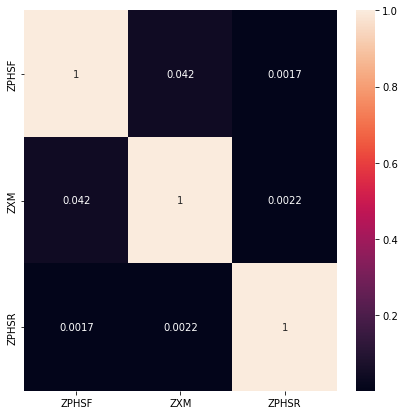

In [251]:
#зависимость скорости самолёта от его угла отклонения
to_corr = data_p[['ZPHSF', 'ZXM', 'ZPHSR']]
sns.heatmap(to_corr.corr(), annot=True)
plt.rcParams['figure.figsize']=(7, 7)

In [252]:
#Feature engineering, добавим категориальные признаки с помощью OneHotEncoder
columns_to_change = ['engine_type', 'flight_phase', 'aircraft_grp', 'engine_family', 'manufacturer', 'aircraft_family', 'aircraft_type', 'ac_manufacturer']
b = OneHotEncoder(sparse=False)
data_onehot = b.fit_transform(data_p[columns_to_change])
column_names = b.get_feature_names_out(columns_to_change)
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
data_p = pd.concat([
    data_p.drop(columns_to_change, axis=1),
    data_onehot
], axis=1)

data_p.head()

,engine_position,n1_modifier,number_blades,ZPCN12,ZPCN25,ZT49,IAI,IVS12,ZALT,ZT1A,...,aircraft_family_A320,aircraft_family_B737,aircraft_family_EMBRAER RJ,aircraft_type_A320-200,aircraft_type_A321-200,aircraft_type_B737-800,aircraft_type_ERJ170,ac_manufacturer_AIRBUS,ac_manufacturer_BOEING,ac_manufacturer_EMBRAER
0,1,6.0,36.0,83.400002,93.300003,677.000,0.0,0.0,2314.0000,-2.90,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,0.0,28.0,81.359299,82.984299,708.875,0.0,0.0,31001.0000,-21.10,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,6.0,36.0,84.900002,95.800003,698.000,0.0,0.0,932.0000,17.50,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,5.0,36.0,86.400002,95.000000,661.000,0.0,0.0,37002.0000,-15.40,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,4.0,24.0,89.879997,93.690002,674.000,0.0,0.0,37025.8008,-20.75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [253]:
data_p['engine_type_CFM56-5B4'] #тип данных в столбце двигателя

0        1.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
47789    0.0
47790    0.0
47791    0.0
47792    0.0
47793    0.0
Name: engine_type_CFM56-5B4, Length: 47794, dtype: float64

# BaseLine


In [ ]:
#Подгружаем таргеты
data_f = pd.read_csv('/content/y_train.csv')
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47794 entries, 0 to 47793
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_datetime  47794 non-null  object 
 1   flight_phase     47794 non-null  object 
 2   engine_id        47794 non-null  object 
 3   BRAT             47721 non-null  float64
 4   DEGT             28279 non-null  float64
 5   DELFN            9880 non-null   float64
 6   DELN1            9880 non-null   float64
 7   DELVSV           11884 non-null  float64
 8   DPOIL            19250 non-null  float64
 9   EGTC             28279 non-null  float64
 10  EGTHDM           36961 non-null  float64
 11  EGTHDM_D         18993 non-null  float64
 12  GEGTMC           19203 non-null  float64
 13  GN2MC            19203 non-null  float64
 14  GPCN25           28279 non-null  float64
 15  GWFM             28279 non-null  float64
 16  PCN12            47512 non-null  float64
 17  PCN12I      

In [ ]:
# удаляем ненужные столбцы
data_f.drop('flight_datetime', axis=1, inplace=True)
data_f.drop('flight_phase', axis=1, inplace=True)
data_f.drop('engine_id', axis=1, inplace=True)
data_f.drop('VSVNOM', axis=1, inplace=True)

In [ ]:
# обучаем на таргетах, используя понижение размерности и выбор ключевых переменных для снижения кореляции
np.random.seed(0)
res_mse = []
res_mape = []
np.random.seed(0)

for col in data_f.columns:

      pred = data_f[col]
      train_data = pd.concat([
        pred,
        data_p
      ], axis=1)

      train_data.dropna(axis=0, inplace=True) #убираем строки с пропущенными таргетами

      X = train_data.drop(col, axis=1)
      y = train_data[col]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      scaler = preprocessing.StandardScaler()
      X_scaled_train = scaler.fit_transform(X_train)
      X_scaled_test = scaler.fit_transform(X_test)

      select = RFE(linear_model.SGDRegressor(loss = 'squared_error', 
          eta0 = 0.002, 
          random_state=42,), n_features_to_select=95)
      select.fit(X_scaled_train, y_train)
      X_train_selected = select.transform(X_scaled_train)
      X_test_selected = select.transform(X_scaled_test)

      model = CatBoostRegressor(iterations=1000, verbose=False, loss_function='MAPE')
      model.fit(X_train_selected, y_train)

      catboost_predicted = model.predict(X_test_selected)
      catboost_score = metrics.mse(y_test, catboost_predicted)
      catboost_score = str(catboost_score).split(',')
      catboost_score = catboost_score[0].replace('tf.Tensor(', '')
      res_mse.append((f'{col}', catboost_score))

      catboost_score_mape = metrics.mape(y_test, catboost_predicted)
      catboost_score_mape = str(catboost_score_mape).split(',')
      catboost_score_mape = catboost_score_mape[0].replace('tf.Tensor(', '')
      res_mape.append((f'{col}', catboost_score_mape))






In [ ]:
#изучаем метрики модели - mse
data_r = pd.DataFrame(res_mse)
data_r.to_excel('base_line_mse.xlsx')

In [ ]:
#mape
data_r_m = pd.DataFrame(res_mape)
data_r_m

,0,1
0,BRAT,12645239.809765244
1,DEGT,102.97863407076267
2,DELFN,38.97716377282315
3,DELN1,21.55331774141479
4,DELVSV,315905.6931655189
5,DPOIL,1.823868724753341
6,EGTC,1.1548625122448704
7,EGTHDM,59.812830255893246
8,EGTHDM_D,796585.3325859329
9,GEGTMC,4.994720183762104


По увиденным метрикам в mape и mae мы можем заметить, что некоторые таргеты невозможно предсказать, так как при использвании модели Crisp-dm, мы заметили, например, температуру над уровнем моря невозможно предсказать по полученным данным, так же некорректно формировать мнение о состоянии систем ЛА, основываясь на усреднённых номинальных характеристиках, полученных из свободных источников, так как конкретные номинальные характеристики для каждой модели двигателя самолёта нами получены не были, следовательно требуется уменьшить набор таргетов, все величины, где MAPE более 90% будут отброшены.

# Построение моделей по видам двигателей


In [ ]:
#Производим дополнительную отчистку данных, удаляя лишние таргеты
data_f.drop('DEGT', axis=1, inplace=True)
data_f.drop('DELVSV', axis=1, inplace=True)
data_f.drop('EGTHDM_D', axis=1, inplace=True)
data_f.drop('GWFM', axis=1, inplace=True)
data_f.drop('PCN1BR', axis=1, inplace=True)
data_f.drop('SLOATL_D', axis=1, inplace=True)
data_f.drop('WBE', axis=1, inplace=True)
data_f.drop('ZPCN25_D', axis=1, inplace=True)
data_f.drop('ZT49_D', axis=1, inplace=True)
data_f.drop('ZTNAC_D', axis=1, inplace=True)
data_f.drop('ZWF36_D', axis=1, inplace=True)

In [ ]:
#Для начала обучим простые модели как в baseline и сохраним их
np.random.seed(0)
res_mse = []
res_mape = []

for col in data_f.columns:

      pred = data_f[col]
      train_data = pd.concat([
        pred,
        data_p
      ], axis=1)

      train_data.dropna(axis=0, inplace=True) #убираем строки с пропущенными таргетами

      X = train_data.drop(col, axis=1)
      y = train_data[col]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      scaler = preprocessing.StandardScaler()
      X_scaled_train = scaler.fit_transform(X_train)
      X_scaled_test = scaler.transform(X_test)

      with open(f'/content/drive/MyDrive/models/base_{col}_scaled', 'wb') as f:
        pickle.dump(scaler, f)

      select = RFE(linear_model.SGDRegressor(loss = 'squared_error', 
          eta0 = 0.002, 
          random_state=42,), n_features_to_select=95)
      select.fit(X_scaled_train, y_train)
      X_train_selected = select.transform(X_scaled_train)
      X_test_selected = select.transform(X_scaled_test)

      with open(f'/content/drive/MyDrive/models/base_{col}_selected', 'wb') as f:
        pickle.dump(select, f)

      model = CatBoostRegressor(iterations=1000, verbose=False, loss_function='MAPE')
      model.fit(X_train_selected, y_train)
      model.save_model(f'/content/drive/MyDrive/models/base_{col}')

      catboost_predicted = model.predict(X_test_selected)
      catboost_score = metrics.mse(y_test, catboost_predicted)
      catboost_score = str(catboost_score).split(',')
      catboost_score = catboost_score[0].replace('tf.Tensor(', '')
      res_mse.append((f'{col}', catboost_score))

      catboost_score_mape = metrics.mape(y_test, catboost_predicted)
      catboost_score_mape = str(catboost_score_mape).split(',')
      catboost_score_mape = catboost_score_mape[0].replace('tf.Tensor(', '')

      res_mape.append((f'{col}', catboost_score_mape))



In [ ]:
#изучаем метрики модели - mse
data_r = pd.DataFrame(res_mse)
data_r

In [ ]:
#Модель по видам двигателей
res_mse_engine = []
res_mape_engine = []
res_mape_train = []
np.random.seed(0)
type_engine = ['CFM56-5B4', 'CF34-8E5', 'CFM56-7B27/B1', 'CFM56-7B26',
       'CFM56-5B3']

for col in data_f.columns:
  for engine in type_engine:
    try:
      pred = data_f[col]
      train_data = pd.concat([
        pred,
        data_p
      ], axis=1)
      train_data = train_data.loc[train_data[f'engine_type_{engine}'] == 1.0] #выбор определённого типа двигателя 
      train_data.dropna(axis=0, inplace=True) #убираем строки с пропущенными таргетами

      X = train_data.drop(col, axis=1)
      y = train_data[col]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      scaler = preprocessing.StandardScaler()
      X_scaled_train = scaler.fit_transform(X_train)
      X_scaled_test = scaler.transform(X_test)

      with open(f'/content/drive/MyDrive/models_by_engine/base_{col}_{engine}_scaled', 'wb') as f:
        pickle.dump(scaler, f)

      select = RFE(linear_model.SGDRegressor(loss = 'squared_error', 
          eta0 = 0.002, 
          random_state=42,), n_features_to_select=95)
      select.fit(X_scaled_train, y_train)
      X_train_selected = select.transform(X_scaled_train)
      X_test_selected = select.transform(X_scaled_test)

      with open(f'/content/drive/MyDrive/models_by_engine/base_{col}_{engine}_selected', 'wb') as f:
        pickle.dump(select, f)

      model = CatBoostRegressor(iterations=1000, verbose=False, loss_function='MAPE')
      model.fit(X_train_selected, y_train)
      res_mape_train.append((model.get_params(), f'{col}_{engine}'))
      model.save_model(f'/content/drive/MyDrive/models_by_engine/base_{col}_{engine}')

      catboost_predicted = model.predict(X_test_selected)
      catboost_score = metrics.mse(y_test, catboost_predicted)
      catboost_score = str(catboost_score).split(',')
      catboost_score = catboost_score[0].replace('tf.Tensor(', '')
      res_mse_engine.append((f'{col}_{engine}', catboost_score))

      catboost_score_mape = metrics.mape(y_test, catboost_predicted)
      catboost_score_mape = str(catboost_score_mape).split(',')
      catboost_score_mape = catboost_score_mape[0].replace('tf.Tensor(', '')

      res_mape_engine.append((f'{col}_{engine}', catboost_score_mape))
    except:
      continue #не для всех видов двигателей есть данные => невозможно предсказать некоторые признаки


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

In [ ]:
#оценка качества модели - #mse
data_r_engine = pd.DataFrame(res_mse_engine)
data_r_engine.to_excel('model_rmse.xlsx')

In [ ]:
#mape
data_r_mape_engine = pd.DataFrame(res_mape_engine)
data_r_mape_engine

,0,1
0,BRAT_CFM56-5B4,1330819.1484487304
1,BRAT_CF34-8E5,4007754.7735889843
2,BRAT_CFM56-7B26,5273351.63797994
3,BRAT_CFM56-5B3,3848827.3051516283
4,DELFN_CFM56-5B4,11.985472967388496
...,...,...
58,WFMP_CFM56-5B4,0.7810363655272139
59,WFMP_CF34-8E5,1.1715057641751052
60,WFMP_CFM56-7B26,0.8794002272646502
61,WFMP_CFM56-5B3,1.2236546581041765


# Предсказания Модели на валидационной выборке


In [ ]:
#добавляем преобразование данных
def preprocess(link):
  data_plane_full = pd.read_csv(link)
  data_plane_full
  arr = ['IAI', 'IVS12', 'IBP', 'IAIE']
  columns_to = []
  for col in data_plane_full.columns:
    if cols_null_persent[col] != 0.0:
        if col in arr:
          data_plane_full[col + '_was_null'] = data_plane_full[col].isnull().astype('int')
          data_plane_full.fillna({col:data_plane_full[col].mode()[0]}, inplace = True)
        else:
          data_plane_full[col + '_was_null'] = data_plane_full[col].isnull().astype('int') 
          columns_to.append(col)

  data_p = data_plane_full.copy()
      
  imp_mean = IterativeImputer(random_state=0)
  imp_mean = imp_mean.fit_transform(data_p[columns_to])
  data_full = pd.DataFrame(imp_mean, columns=columns_to)
  data_p = pd.concat([
      data_p.drop(columns_to, axis=1),
      data_full
  ], axis=1)

  data_p.drop('engine_id', axis=1, inplace=True)
  data_p.drop('flight_datetime', axis=1, inplace=True)
  data_p.drop('aircraft_id', axis=1, inplace=True)

  columns_to_change = ['engine_type', 'flight_phase', 'aircraft_grp', 'engine_family', 'manufacturer', 'aircraft_family', 'aircraft_type', 'ac_manufacturer']
  b = OneHotEncoder(sparse=False)
  data_onehot = b.fit_transform(data_p[columns_to_change])
  column_names = b.get_feature_names_out(columns_to_change)
  data_onehot = pd.DataFrame(data_onehot, columns=column_names)
  data_p = pd.concat([
      data_p.drop(columns_to_change, axis=1),
      data_onehot
  ], axis=1)
  return data_p


In [ ]:
#Предсказания модели
data_p = preprocess('/content/X_valid.xlsx')
model_answers = []
labels = []
np.random.seed(0)
type_engine = ['CFM56-5B4', 'CF34-8E5', 'CFM56-7B27/B1', 'CFM56-7B26',
       'CFM56-5B3']

for col in data_f.columns:
  for engine in type_engine:
    try:
      train_data = data_p.loc[data_p[f'engine_type_{engine}'] == 1.0] #выбор определённого типа двигателя 

      X = train_data

      with open(f'/content/drive/MyDrive/models_by_engine/base_{col}_{engine}_scaled', 'rb') as f:
          scaler = pickle.load(f)
      X = scaler.transform(X)

      with open(f'/content/drive/MyDrive/models_by_engine/base_{col}_{engine}_selected', 'rb') as f:
          select = pickle.load(f)
      X = select.transform(X)

      model = CatBoostRegressor()
      model = model.load_model(f'/content/drive/MyDrive/models_by_engine/base_{col}_{engine}')

      catboost_predicted = model.predict(X)
      model_answers.append(catboost_predicted)
      labels.append(f'{col}_{engine}')
      

    except:
      continue #не для всех видов двигателей есть данные => невозможно предсказать некоторые признаки

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
data_f.columns

Index(['BRAT', 'DELFN', 'DELN1', 'DPOIL', 'EGTC', 'EGTHDM', 'GEGTMC', 'GN2MC',
       'GPCN25', 'PCN12', 'PCN12I', 'PCN1AR', 'PCN1K', 'PCN2C', 'SLOATL',
       'WBI', 'WFMP', 'ZTLA_D'],
      dtype='object')

In [ ]:
#Преобразуем ответы модели
model_answers = pd.DataFrame(model_answers, labels).T
model_answers

,BRAT_CFM56-5B4,BRAT_CF34-8E5,BRAT_CFM56-7B26,BRAT_CFM56-5B3,DELFN_CFM56-5B4,DELFN_CFM56-7B26,DELFN_CFM56-5B3,DELN1_CFM56-5B4,DELN1_CFM56-7B26,DELN1_CFM56-5B3,...,SLOATL_CFM56-5B3,WBI_CFM56-5B4,WBI_CF34-8E5,WBI_CFM56-7B26,WBI_CFM56-5B3,WFMP_CFM56-5B4,WFMP_CF34-8E5,WFMP_CFM56-7B26,WFMP_CFM56-5B3,ZTLA_D_CF34-8E5
0,0.915105,1.014636,1.000000,0.835303,21.652692,14.578716,16.082695,8.718402,5.692202,8.571351,...,42.777956,-0.084947,-1.299660e-32,0.966278,-0.165772,2905.821500,1974.949486,2964.415168,3014.943144,-0.075765
1,0.893767,0.970528,0.957506,1.015685,22.855553,14.772922,17.912247,9.076035,5.381475,8.458089,...,33.915953,-0.218049,-4.232334e-02,0.965941,0.017777,2896.349009,1851.213936,2544.882390,3057.427266,-0.005219
2,0.893764,0.978553,1.000000,0.872032,23.169555,14.921703,16.613450,9.732880,5.883614,8.990168,...,45.139032,-0.106236,-2.158346e-02,0.973919,-0.131399,2693.767971,1687.215984,2948.861010,3234.175974,-0.002352
3,0.915045,0.951186,0.973897,0.834935,22.867521,8.696765,16.856904,9.582745,3.531539,8.656575,...,45.110575,-0.084957,-7.372772e-02,0.964242,-0.165997,2730.078266,1611.792503,2921.766981,3012.463440,-0.009970
4,0.893764,0.971698,0.987482,0.868131,22.650502,21.789027,16.189924,9.173203,8.402964,8.779446,...,40.301055,-0.106236,-1.871284e-02,0.939281,-0.131479,2842.608732,1736.296904,2985.742685,3177.974570,-0.054071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10967,NaN,0.930166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-4.253727e-02,NaN,NaN,NaN,1732.356547,NaN,NaN,-0.004062
10968,NaN,0.832891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.908433e-32,NaN,NaN,NaN,2031.295693,NaN,NaN,-0.045003
10969,NaN,0.974005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-5.261439e-02,NaN,NaN,NaN,1924.219626,NaN,NaN,0.008909
10970,NaN,0.950696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-4.559347e-02,NaN,NaN,NaN,1924.431855,NaN,NaN,0.017508


In [ ]:
#загружаем в excel формат
model_answers.to_excel('model_engine_answers.xlsx')

In [ ]:
#оценка качества Base модели и её ответы

np.random.seed(0)
res_ans = []
labels = []
np.random.seed(0)
data_p = preprocess('/content/X_valid.xlsx')

for col in data_f.columns:

      X = data_p

      with open(f'/content/drive/MyDrive/models/base_{col}_scaled', 'rb') as f:
        scaler = pickle.load(f)
      X = scaler.transform(X)

      with open(f'/content/drive/MyDrive/models/base_{col}_selected', 'rb') as f:
          select = pickle.load(f)
      X = select.transform(X)

      model = CatBoostRegressor()
      model = model.load_model(f'/content/drive/MyDrive/models/base_{col}')

      catboost_predicted = model.predict(X)
      res_ans.append(catboost_predicted)
      labels.append(f'{col}')
      



/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
model_answers = pd.DataFrame(res_ans, labels).T
model_answers

,BRAT,DELFN,DELN1,DPOIL,EGTC,EGTHDM,GEGTMC,GN2MC,GPCN25,PCN12,PCN12I,PCN1AR,PCN1K,PCN2C,SLOATL,WBI,WFMP,ZTLA_D
0,0.846772,27.176245,11.890603,-5.136528,724.949410,17.709443,26.318859,3.721944,-0.117402,89.358870,88.419809,86.503863,91.037561,90.913175,34.866536,0.075854,3006.707071,-0.075765
1,0.996640,14.878544,5.860687,-7.848485,681.756259,59.649190,55.950931,2.330883,-0.310606,90.410656,90.310602,92.216124,92.297865,95.553195,44.986548,0.283535,3139.171876,0.022062
2,0.916688,20.378934,7.545593,-18.340628,594.452931,67.856482,134.206052,2.963906,0.204541,82.107481,82.123897,88.862320,89.617025,90.872568,66.581007,-0.082620,2900.106254,0.003775
3,1.019171,21.391236,7.589273,-4.697236,742.253117,27.629582,4.800108,3.662318,0.054857,91.212332,90.961754,91.471812,95.252073,89.555948,39.842495,-0.237570,2122.198942,-0.005219
4,0.848484,23.239009,9.794816,-22.207233,620.857223,46.664521,92.387493,1.944509,-0.039311,84.353379,84.425946,89.365565,92.039605,91.733427,43.864217,-0.165317,2950.880775,-0.008172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28671,0.895784,20.637619,7.380424,-23.725487,626.066355,66.462996,139.451415,3.102791,0.074720,84.202742,84.217099,91.166407,91.143268,92.166405,67.414171,-0.104897,2775.644948,-0.007815
28672,0.828566,13.087277,5.681573,-8.207967,696.872465,52.912752,91.123402,2.429793,-0.038112,93.996585,93.891437,92.610106,92.991014,96.350820,46.244900,0.477816,3363.639541,-0.018966
28673,0.846519,30.257410,13.029946,-5.127541,721.489993,32.822501,26.529439,3.693782,-0.070099,89.451197,88.237739,85.295265,88.535477,91.273510,40.017232,0.096263,3007.466326,-0.091608
28674,0.996583,16.262252,6.925274,-7.415284,674.356939,61.055452,46.653892,2.245624,-0.180611,88.836919,88.940349,90.420422,90.858343,95.250527,46.403790,0.324556,3078.591304,0.019606


In [ ]:
model_answers.to_excel('model_classic_answers.xlsx')

# Точность модели на тестовой выборке


In [ ]:
#получаем предобработанные входные данные
data_p = preprocess('/content/X_test.csv')
data_f = pd.read_csv('/content/y_test.csv')
data_f.drop('flight_datetime', axis=1, inplace=True)
data_f.drop('flight_phase', axis=1, inplace=True)
data_f.drop('engine_id', axis=1, inplace=True)
data_f.drop('VSVNOM', axis=1, inplace=True)
#Производим дополнительную отчистку данных, удаляя лишние таргеты
data_f.drop('DEGT', axis=1, inplace=True)
data_f.drop('DELVSV', axis=1, inplace=True)
data_f.drop('EGTHDM_D', axis=1, inplace=True)
data_f.drop('GWFM', axis=1, inplace=True)
data_f.drop('PCN1BR', axis=1, inplace=True)
data_f.drop('SLOATL_D', axis=1, inplace=True)
data_f.drop('WBE', axis=1, inplace=True)
data_f.drop('ZPCN25_D', axis=1, inplace=True)
data_f.drop('ZT49_D', axis=1, inplace=True)
data_f.drop('ZTNAC_D', axis=1, inplace=True)
data_f.drop('ZWF36_D', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
res_mse = []
np.random.seed(0)

for col in data_f.columns:

      pred = data_f[col]
      train_data = pd.concat([
        pred,
        data_p
      ], axis=1)

      train_data.dropna(axis=0, inplace=True) #убираем строки с пропущенными таргетами

      X = train_data.drop(col, axis=1)
      y = train_data[col]

      with open(f'/content/drive/MyDrive/models/base_{col}_scaled', 'rb') as f:
        scaler = pickle.load(f)
      X = scaler.transform(X)

      with open(f'/content/drive/MyDrive/models/base_{col}_selected', 'rb') as f:
          select = pickle.load(f)
      X = select.transform(X)

      
      model = CatBoostRegressor()
      model = model.load_model(f'/content/drive/MyDrive/models/base_{col}')
      catboost_predicted = model.predict(X)

      catboost_score = metrics.mse(y, catboost_predicted)
      catboost_score = str(catboost_score).split(',')
      catboost_score = catboost_score[0].replace('tf.Tensor(', '')
      res_mse.append((f'{col}', catboost_score))




In [ ]:
res_mse = pd.DataFrame(res_mse)
res_mse

,0,1
0,BRAT,0.013449919344888789
1,DELFN,3.6488249828825166
2,DELN1,0.14150167899414673
3,DPOIL,0.07115226516713004
4,EGTC,119.93072057380084
5,EGTHDM,171.2109132005054
6,GEGTMC,44.604159615674234
7,GN2MC,0.022066541650725732
8,GPCN25,0.03686185132824105
9,PCN12,0.13758568383240918


In [ ]:
res_mse.to_excel('base_test_result.xlsx')

# Итоговая модель, основанная на всех запросах и проанализированных данных

In [254]:
data_f = pd.read_csv('/content/y_train.csv')
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47794 entries, 0 to 47793
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_datetime  47794 non-null  object 
 1   flight_phase     47794 non-null  object 
 2   engine_id        47794 non-null  object 
 3   BRAT             47721 non-null  float64
 4   DEGT             28279 non-null  float64
 5   DELFN            9880 non-null   float64
 6   DELN1            9880 non-null   float64
 7   DELVSV           11884 non-null  float64
 8   DPOIL            19250 non-null  float64
 9   EGTC             28279 non-null  float64
 10  EGTHDM           36961 non-null  float64
 11  EGTHDM_D         18993 non-null  float64
 12  GEGTMC           19203 non-null  float64
 13  GN2MC            19203 non-null  float64
 14  GPCN25           28279 non-null  float64
 15  GWFM             28279 non-null  float64
 16  PCN12            47512 non-null  float64
 17  PCN12I      

In [255]:
data_f.drop('flight_datetime', axis=1, inplace=True)
data_f.drop('flight_phase', axis=1, inplace=True)
data_f.drop('engine_id', axis=1, inplace=True)
data_f.drop('VSVNOM', axis=1, inplace=True)

In [256]:
#преобразуем ряд дополнительных категориальных признаков
columns_to_change = ['n1_modifier', 'IBP', 'IAIE', 'IBE']
b = OneHotEncoder(sparse=False)
data_onehot = b.fit_transform(data_p[columns_to_change])
column_names = b.get_feature_names_out(columns_to_change)
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
data_p = pd.concat([
    data_p.drop(columns_to_change, axis=1),
    data_onehot
], axis=1)


In [257]:
#проверка
data_p.shape

(47794, 115)

In [258]:
# обучаем на таргетах, используя понижение размерности и выбор ключевых переменных для снижения кореляции, использование валидационной выборки для повышения точности
np.random.seed(0)
res_mse = []
res_mape = []
np.random.seed(0)

for col in data_f.columns:

      pred = data_f[col]
      train_data = pd.concat([
        pred,
        data_p
      ], axis=1)

      train_data.dropna(axis=0, inplace=True) #убираем строки с пропущенными таргетами

      X = train_data.drop(col, axis=1)
      y = train_data[col]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      scaler = preprocessing.StandardScaler()
      X_scaled_train = scaler.fit_transform(X_train)
      X_scaled_test = scaler.fit_transform(X_test)

      with open(f'/content/drive/MyDrive/final_model/model_{col}_scaled', 'wb') as f:
        pickle.dump(scaler, f)

      select = RFE(linear_model.SGDRegressor(loss = 'squared_error', 
          eta0 = 0.002, 
          random_state=42,), n_features_to_select=95)
      select.fit(X_scaled_train, y_train)
      X_train_selected = select.transform(X_scaled_train)
      X_test_selected = select.transform(X_scaled_test)

      with open(f'/content/drive/MyDrive/final_model/model_{col}_selected', 'wb') as f:
        pickle.dump(select, f)

      model = CatBoostRegressor(iterations=2000, verbose=False, loss_function='MAPE', eval_metric='MAPE')
      model.fit(X_train_selected, y_train, eval_set = (X_test_selected, y_test))
      model.save_model(f'/content/drive/MyDrive/final_model/model_{col}')

      catboost_predicted = model.predict(X_test_selected)
      catboost_score = metrics.mse(y_test, catboost_predicted)
      catboost_score = str(catboost_score).split(',')
      catboost_score = catboost_score[0].replace('tf.Tensor(', '')
      res_mse.append((f'{col}', catboost_score))

      catboost_score_mape = metrics.mape(y_test, catboost_predicted)
      catboost_score_mape = str(catboost_score_mape).split(',')
      catboost_score_mape = catboost_score_mape[0].replace('tf.Tensor(', '')
      res_mape.append((f'{col}', catboost_score_mape))




In [259]:
#смотрим на rmse метрику
res_mse = pd.DataFrame(res_mse)
res_mse

,0,1
0,BRAT,0.013234801105428583
1,DEGT,83.51391574156101
2,DELFN,3.996428337893561
3,DELN1,0.2533351104419544
4,DELVSV,0.03461694016673793
5,DPOIL,0.07836499698306286
6,EGTC,133.0611323636112
7,EGTHDM,135.36977925208154
8,EGTHDM_D,72.28700350675724
9,GEGTMC,20.834247169898497


In [261]:
#оценка качества модели и её ответы
np.random.seed(0)
res_ans = []
labels = []
np.random.seed(0)
data_p = preprocess('/content/X_valid.xlsx')

columns_to_change = ['n1_modifier', 'IBP', 'IAIE', 'IBE']
b = OneHotEncoder(sparse=False)
data_onehot = b.fit_transform(data_p[columns_to_change])
column_names = b.get_feature_names_out(columns_to_change)
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
data_p = pd.concat([
    data_p.drop(columns_to_change, axis=1),
    data_onehot
], axis=1)

for col in data_f.columns:

      X = data_p

      with open(f'/content/drive/MyDrive/final_model/model_{col}_scaled', 'rb') as f:
        scaler = pickle.load(f)
      X = scaler.transform(X)

      with open(f'/content/drive/MyDrive/final_model/model_{col}_selected', 'rb') as f:
          select = pickle.load(f)
      X = select.transform(X)

      model = CatBoostRegressor()
      model = model.load_model(f'/content/drive/MyDrive/final_model/model_{col}')

      catboost_predicted = model.predict(X)
      res_ans.append(catboost_predicted)
      labels.append(f'{col}')
      



/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


Добавим оценку на тестовой выборке

In [263]:
model_answers = pd.DataFrame(res_ans, labels).T
model_answers.to_csv('y_valid.csv')

In [264]:
data_f = pd.read_csv('/content/y_test.csv')
data_f.drop('flight_datetime', axis=1, inplace=True)
data_f.drop('flight_phase', axis=1, inplace=True)
data_f.drop('engine_id', axis=1, inplace=True)
data_f.drop('VSVNOM', axis=1, inplace=True)

data_p = preprocess('/content/X_test.csv')

columns_to_change = ['n1_modifier', 'IBP', 'IAIE', 'IBE']
b = OneHotEncoder(sparse=False)
data_onehot = b.fit_transform(data_p[columns_to_change])
column_names = b.get_feature_names_out(columns_to_change)
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
data_p = pd.concat([
    data_p.drop(columns_to_change, axis=1),
    data_onehot
], axis=1)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [265]:
#оценка на тестовой выборке
res_mse = []
np.random.seed(0)


for col in data_f.columns:

      pred = data_f[col]
      train_data = pd.concat([
        pred,
        data_p
      ], axis=1)

      train_data.dropna(axis=0, inplace=True) #убираем строки с пропущенными таргетами

      X = train_data.drop(col, axis=1)
      y = train_data[col]

      with open(f'/content/drive/MyDrive/final_model/model_{col}_scaled', 'rb') as f:
        scaler = pickle.load(f)
      X = scaler.transform(X)

      with open(f'/content/drive/MyDrive/final_model/model_{col}_selected', 'rb') as f:
          select = pickle.load(f)
      X = select.transform(X)

      
      model = CatBoostRegressor()
      model = model.load_model(f'/content/drive/MyDrive/final_model/model_{col}')
      catboost_predicted = model.predict(X)

      catboost_score = metrics.mse(y, catboost_predicted)
      catboost_score = str(catboost_score).split(',')
      catboost_score = catboost_score[0].replace('tf.Tensor(', '')
      res_mse.append((f'{col}', catboost_score))




In [266]:
res_mse = pd.DataFrame(res_mse)
res_mse

,0,1
0,BRAT,0.016009285477390004
1,DEGT,137.75485299685562
2,DELFN,3.489406195411923
3,DELN1,0.28222226102654824
4,DELVSV,0.0817866069378558
5,DPOIL,0.1447066228928328
6,EGTC,98.20508889125627
7,EGTHDM,145.71959601757558
8,EGTHDM_D,72.35133571173866
9,GEGTMC,46.69466896199618
